In [1]:
library(dplyr)
data <- read.csv("prostate.csv")
glimpse(data)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Rows: 97
Columns: 6
$ lcavol  <dbl> -0.5798185, -0.9942523, -0.5108256, -1.2039728, 0.7514161, -1.~
$ age     <int> 50, 58, 74, 58, 62, 50, 64, 58, 47, 63, 65, 63, 63, 67, 57, 66~
$ lbph    <dbl> -1.3862944, -1.3862944, -1.3862944, -1.3862944, -1.3862944, -1~
$ lcp     <dbl> -1.3862944, -1.3862944, -1.3862944, -1.3862944, -1.3862944, -1~
$ gleason <int> 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 7, 6, 6, 6, 6,~
$ lpsa    <dbl> -0.4307829, -0.1625189, -0.1625189, -0.1625189, 0.3715636, 0.7~


In [2]:
sapply(data,function(x){sum(is.na(x))})

lcavol     age    lbph     lcp gleason    lpsa 
      0       0       0       0       0       0

In [3]:
library(corrplot)

corrplot 0.92 loaded


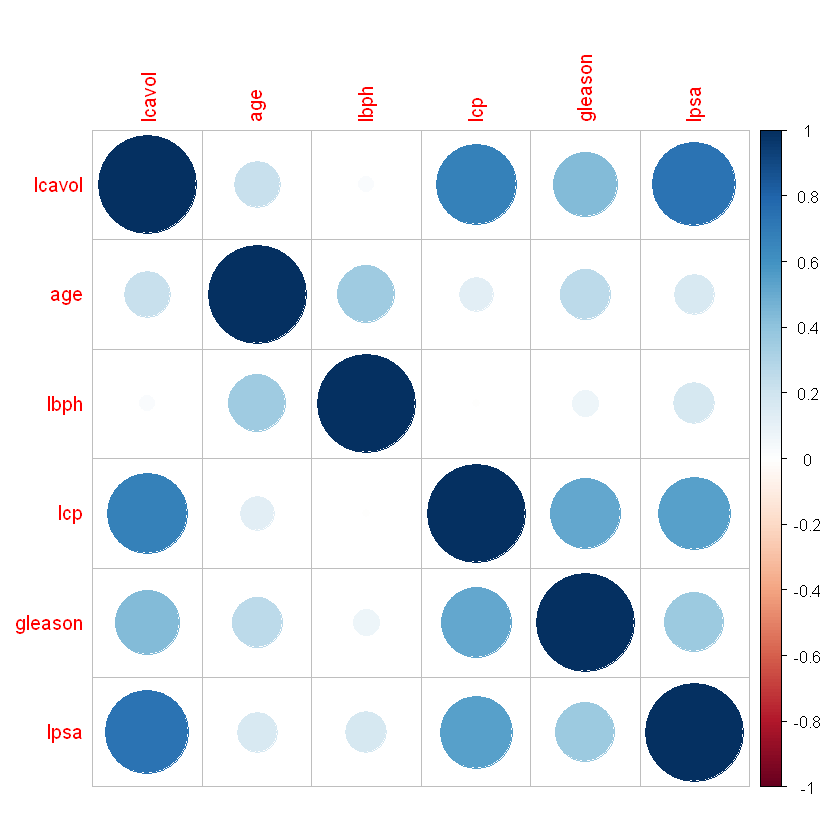

In [4]:
corrplot(cor(data))

In [5]:
slice <- sample(nrow(data),nrow(data)*.9)
train <- data[slice,]
test <- data[-slice,]

In [6]:
library(party)

Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich


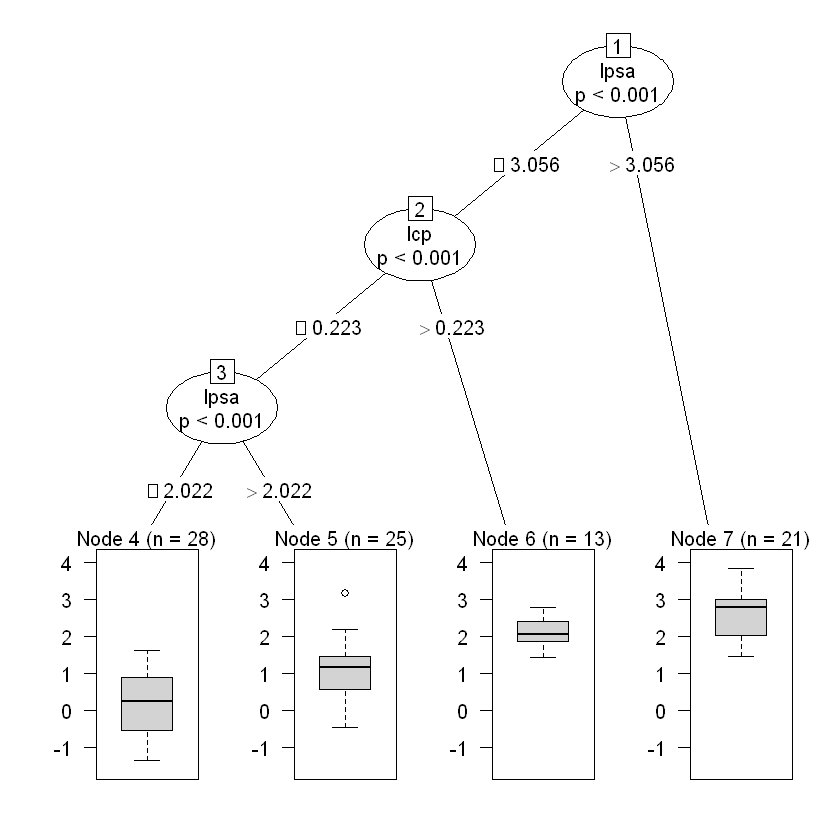

In [7]:
model<- ctree(lcavol~., train)
plot(model)

In [25]:
library(rpart)
model_purn <- rpart(lcavol~., train, method='anova',control=rpart.control(cp=0.075))

In [26]:
library(rpart.plot)

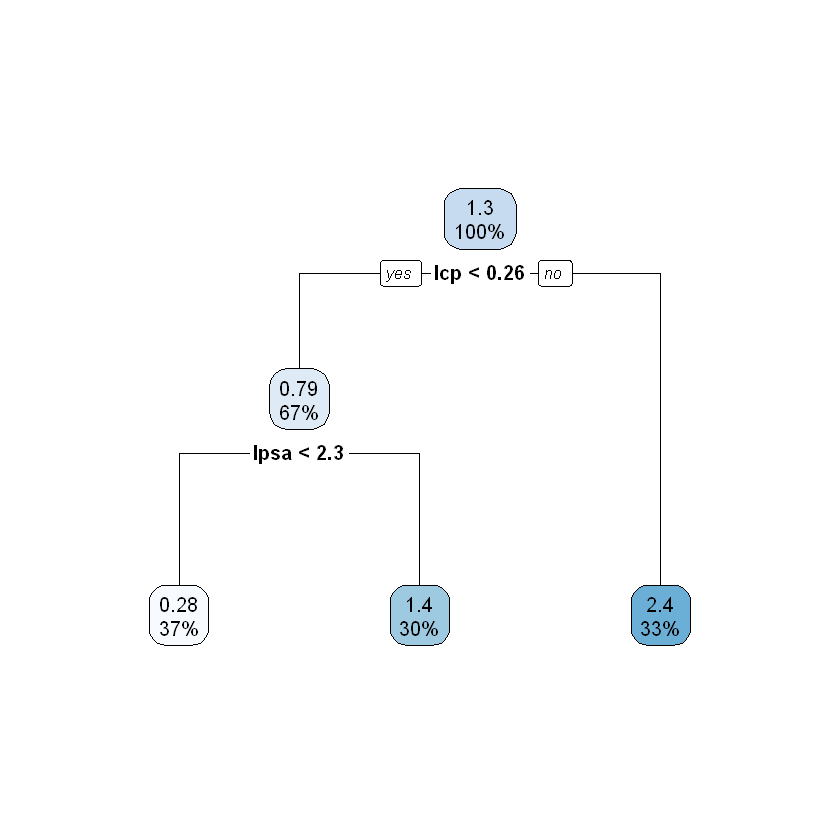

In [27]:
rpart.plot(model_purn,extra=100)

In [28]:
print(model_purn)

n= 87 

node), split, n, deviance, yval
      * denotes terminal node

1) root 87 123.01500 1.3405850  
  2) lcp< 0.2616241 58  59.29200 0.7887683  
    4) lpsa< 2.302573 32  22.46391 0.2770756 *
    5) lpsa>=2.302573 26  18.13750 1.4185440 *
  3) lcp>=0.2616241 29  10.73968 2.4442190 *


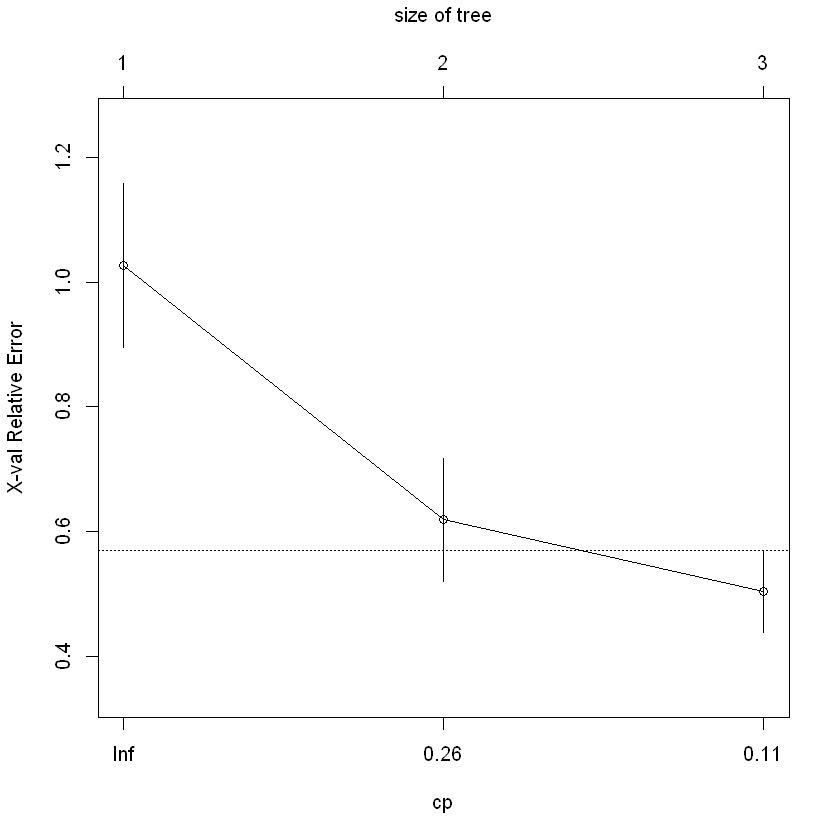

In [29]:
plotcp(model_purn)

In [35]:
library(mltools)
library(dplyr)
library(data.table)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [36]:
modelvfold <- train(lpsa~.,data=train,method='ctree')

In [37]:
print(modelvfold)

Conditional Inference Tree 

87 samples
 5 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 87, 87, 87, 87, 87, 87, ... 
Resampling results across tuning parameters:

  mincriterion  RMSE       Rsquared   MAE      
  0.01          0.9415989  0.3757596  0.7685925
  0.50          0.9371992  0.3767952  0.7650232
  0.99          0.9625494  0.3291734  0.7850659

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mincriterion = 0.5.
